In [2]:
# check running with the correct environment (diffusionsdf-data_processing)
import sys
print(sys.argv[0])
if sys.argv[0].split('/')[-5]!='diffusionsdf-data_processing':
    raise Exception('\n'+('*'*100+'\n')*10+' '*40+'INCORRECT ENVIRONMENT'+'\n'+('*'*100+'\n')*10)

/home/eggonz/miniconda3/envs/diffusionsdf-data_processing/lib/python3.9/site-packages/ipykernel_launcher.py


In [3]:
#!pwd

In [4]:
#!pip install pandas
#!pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# SDF_DATA analysis

In [6]:
SDF_DATA='out_couch/acronym/Couch/37cfcafe606611d81246538126da07a8/sdf_data.csv'

In [7]:
df = pd.read_csv(SDF_DATA, sep=',', header=None)
sdf_data = df.values
print(sdf_data)  # np.ndarray

[[ 1.58685e-01  4.74040e-02  4.43380e-02  0.00000e+00]
 [ 4.43977e-01  8.03040e-02 -3.87120e-02  0.00000e+00]
 [-3.10298e-01 -2.40490e-02 -1.11964e-01  0.00000e+00]
 ...
 [ 2.55715e-01  1.34543e-01  5.41420e-02 -6.99000e-04]
 [-5.61820e-02 -9.49030e-02 -1.12799e-01  6.84000e-04]
 [-1.90720e-02  1.36832e-01 -6.82000e-02 -3.30000e-04]]


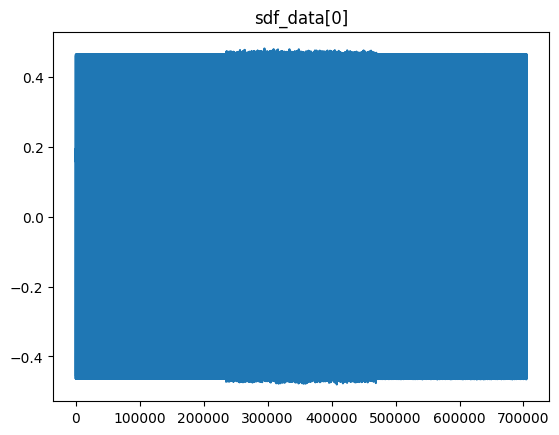

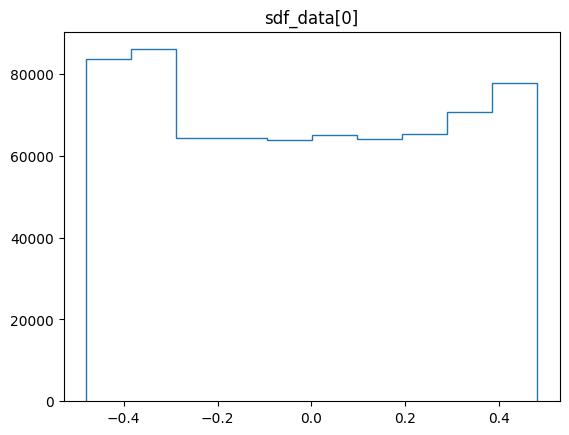

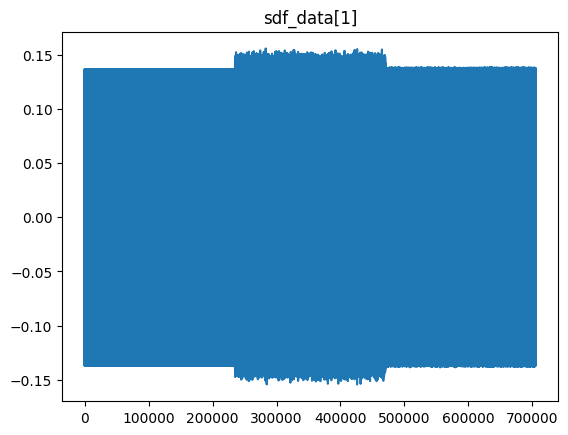

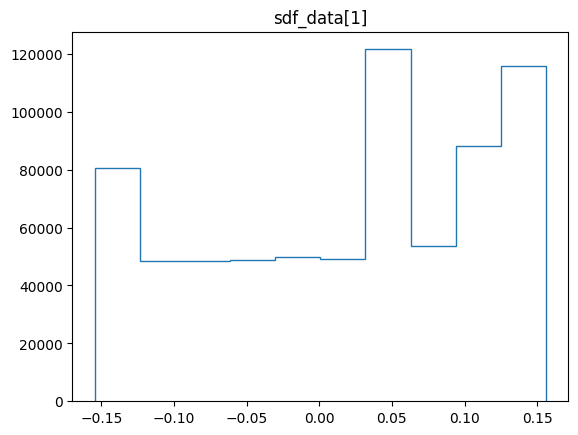

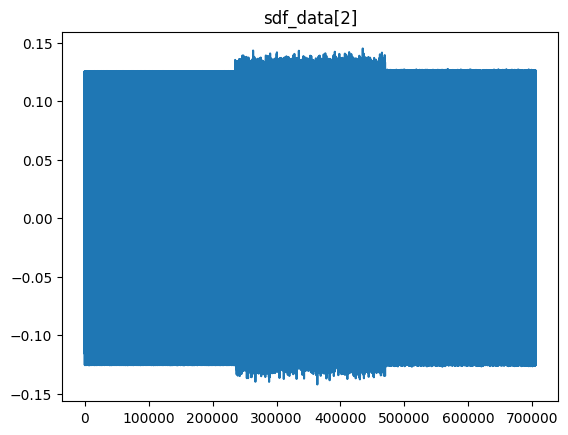

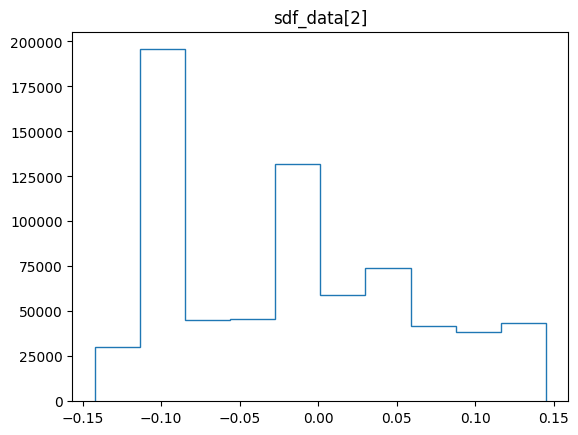

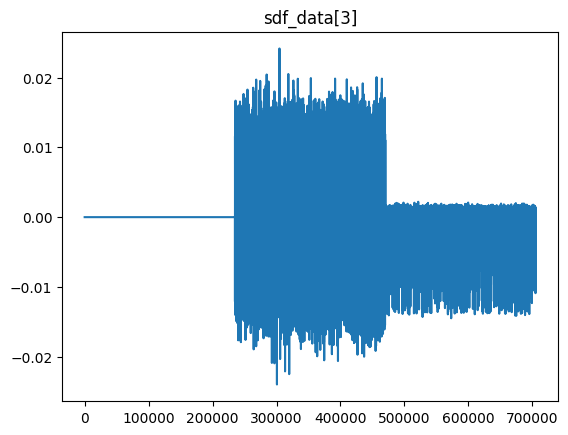

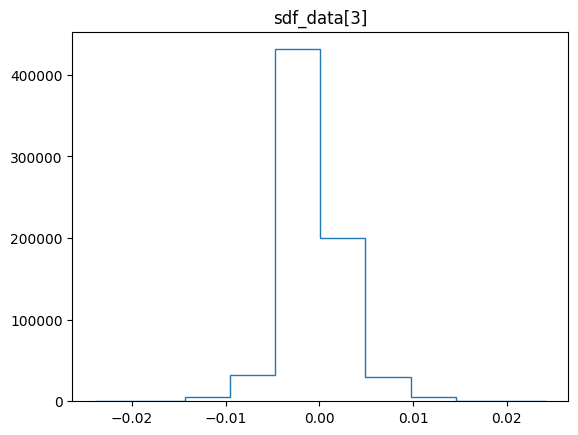

In [8]:
for d in range(4):
    plt.figure()
    plt.title(f'sdf_data[{d}]')
    plt.plot(sdf_data[:,d])
    plt.show()
    
    plt.figure()
    plt.title(f'sdf_data[{d}]')
    counts, bins = np.histogram(sdf_data[:,d])
    plt.stairs(counts, bins)
    plt.show()

So far, it seems they are coordinates + sdf distance in the fourth index

In [9]:
print('points:', sdf_data.shape)
print('sdf!=0 points:', sdf_data[sdf_data[:,3]!=0].shape)
print('sdf>0 points (outside):', sdf_data[sdf_data[:,3]>0].shape)
print('sdf<0 points (inside):', sdf_data[sdf_data[:,3]<0].shape)
print('max sdf:', sdf_data[:,3].max())
print('min sdf:', sdf_data[:,3].min())

points: (705000, 4)
sdf!=0 points: (470000, 4)
sdf>0 points (outside): (236850, 4)
sdf<0 points (inside): (233150, 4)
max sdf: 0.024163
min sdf: -0.023971


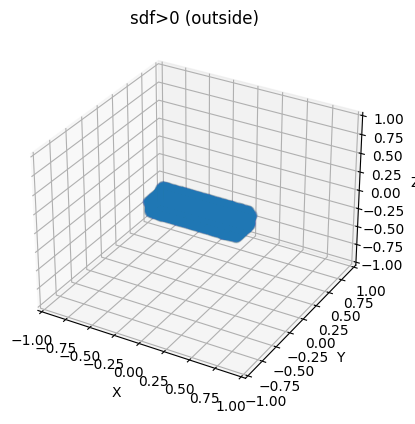

In [10]:
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf>0 (outside)')

thr = 0.005  # threshold
points = sdf_data[sdf_data[:,3]>thr]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.show()

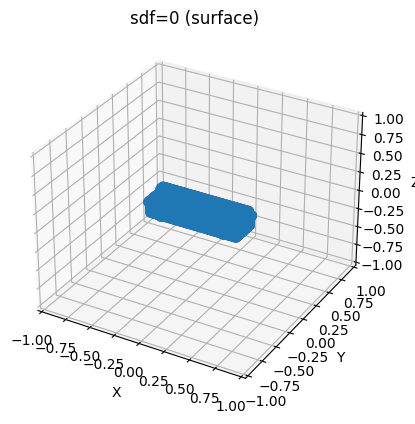

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf=0 (surface)')

points = sdf_data[sdf_data[:,3]==0]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.show()

It has couch shape. Applying a threshold in last dimension limits point amount.

The sdf_data list is a point cloud for the couch object. Apparently, last dim corrsponds to sdf.

# GRID_GT analysis

In [12]:
GRID_GT='out_couch/grid_data/acronym/Couch/37cfcafe606611d81246538126da07a8/grid_gt.csv'

In [13]:
df = pd.read_csv(GRID_GT, sep=',', header=None)
grid_gt = df.values
print(grid_gt)  # np.ndarray

[[-1.       -1.       -1.        1.364614]
 [-1.       -1.       -0.984252  1.354391]
 [-1.       -1.       -0.968504  1.344275]
 ...
 [ 1.        1.        0.968504  1.348275]
 [ 1.        1.        0.984252  1.358244]
 [ 1.        1.        1.        1.368322]]


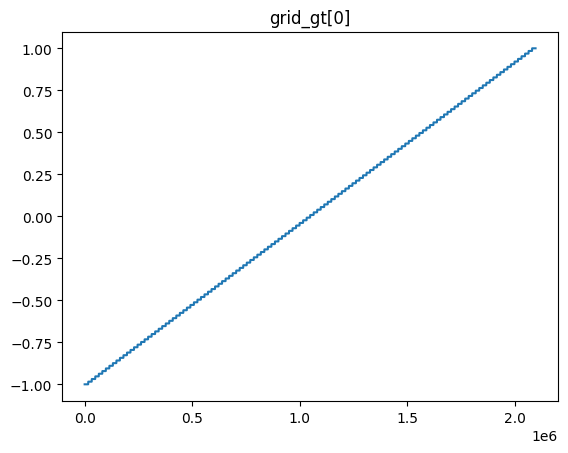

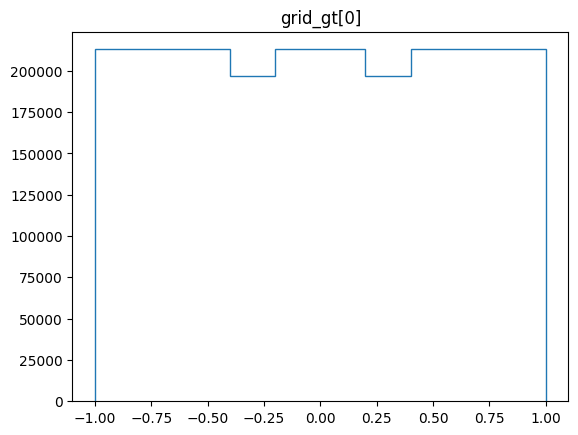

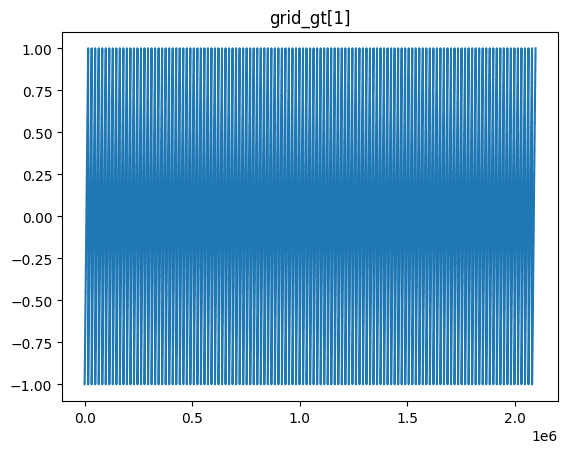

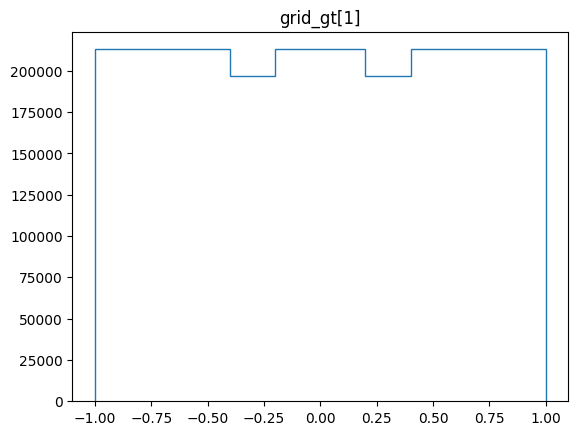

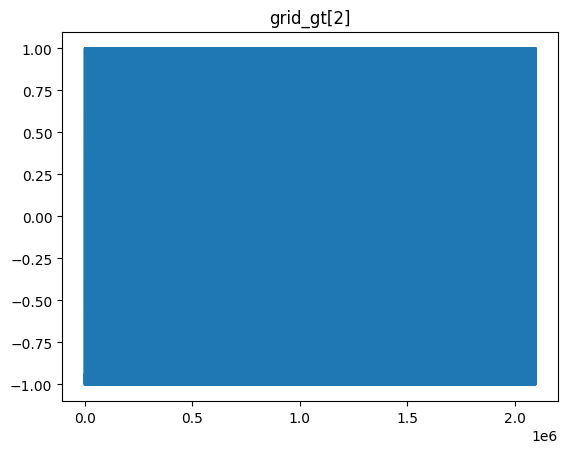

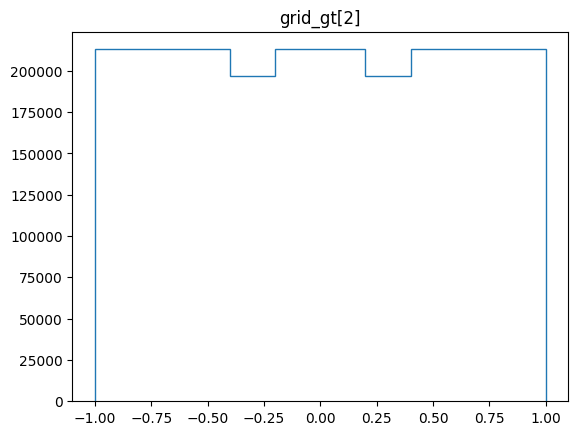

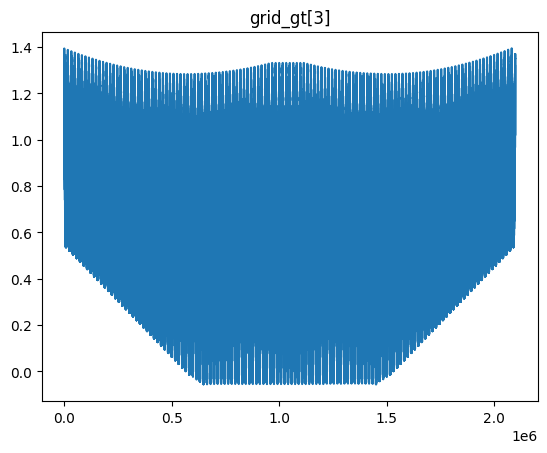

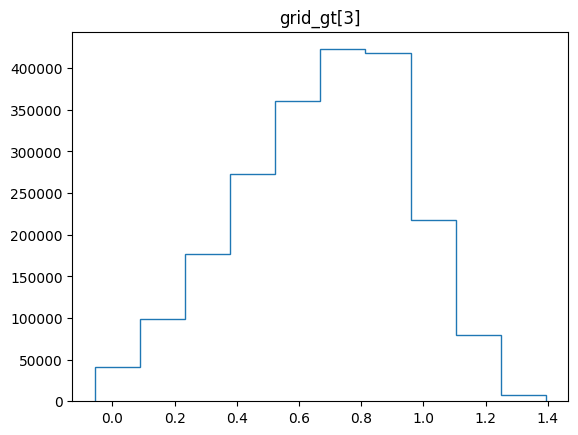

In [14]:
for d in range(4):
    plt.figure()
    plt.title(f'grid_gt[{d}]')
    plt.plot(grid_gt[:,d])
    plt.show()
    
    plt.figure()
    plt.title(f'grid_gt[{d}]')
    counts, bins = np.histogram(grid_gt[:,d])
    plt.stairs(counts, bins)
    plt.show()

It seems that first 3 dimensions are equally distributed. Probably, they will correspond to grid points. The last dimension will be the sdf value at those points.

In [15]:
print('points:', grid_gt.shape)
print('sdf!=0 points:', grid_gt[grid_gt[:,3]!=0].shape)
print('sdf>0 points (outside):', grid_gt[grid_gt[:,3]>0].shape)
print('sdf<0 points (inside):', grid_gt[grid_gt[:,3]>0].shape)
print('max sdf:', grid_gt[:,3].max())
print('min sdf:', grid_gt[:,3].min())

points: (2097152, 4)
sdf!=0 points: (2097152, 4)
sdf>0 points (outside): (2087689, 4)
sdf<0 points (inside): (2087689, 4)
max sdf: 1.393746
min sdf: -0.056544


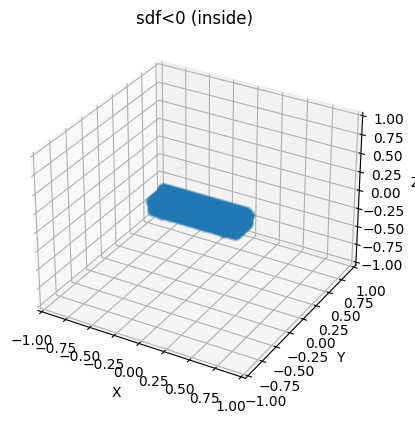

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf<0 (inside)')

points = grid_gt[grid_gt[:,3]<0]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.show()

It is a point cloud with sdf values in last dim, but the points are the whole grid.

WARNING: this grid_gt data contains both points in a grid and points near surface. the grid is linspace(-1,1,50).

# From grid_gt to marching cubes

In [17]:
df = pd.read_csv(GRID_GT, sep=',', header=None)

In [18]:
df = df.sort_values(by=list(range(4)), axis=0).reset_index(drop=True)
df

,0,1,2,3
0,-1.0,-1.0,-1.000000,1.364614
1,-1.0,-1.0,-0.984252,1.354391
2,-1.0,-1.0,-0.968504,1.344275
3,-1.0,-1.0,-0.952756,1.334268
4,-1.0,-1.0,-0.937008,1.324373
...,...,...,...,...
2097147,1.0,1.0,0.937008,1.328671
2097148,1.0,1.0,0.952756,1.338416
2097149,1.0,1.0,0.968504,1.348275
2097150,1.0,1.0,0.984252,1.358244


In [19]:
RES = 128  # 50

In [20]:
np.linspace(-1,1,RES)

array([-1.        , -0.98425197, -0.96850394, -0.95275591, -0.93700787,
       -0.92125984, -0.90551181, -0.88976378, -0.87401575, -0.85826772,
       -0.84251969, -0.82677165, -0.81102362, -0.79527559, -0.77952756,
       -0.76377953, -0.7480315 , -0.73228346, -0.71653543, -0.7007874 ,
       -0.68503937, -0.66929134, -0.65354331, -0.63779528, -0.62204724,
       -0.60629921, -0.59055118, -0.57480315, -0.55905512, -0.54330709,
       -0.52755906, -0.51181102, -0.49606299, -0.48031496, -0.46456693,
       -0.4488189 , -0.43307087, -0.41732283, -0.4015748 , -0.38582677,
       -0.37007874, -0.35433071, -0.33858268, -0.32283465, -0.30708661,
       -0.29133858, -0.27559055, -0.25984252, -0.24409449, -0.22834646,
       -0.21259843, -0.19685039, -0.18110236, -0.16535433, -0.1496063 ,
       -0.13385827, -0.11811024, -0.1023622 , -0.08661417, -0.07086614,
       -0.05511811, -0.03937008, -0.02362205, -0.00787402,  0.00787402,
        0.02362205,  0.03937008,  0.05511811,  0.07086614,  0.08

In [21]:
# extract only grid points, by hand

if len(df) == RES**3:
    print('exact shape :)')
    df = df.sort_values([0,1,2])  # sorted
    volume = np.array(df[3]).reshape((RES, RES, RES))
    
else:
    volume = np.zeros(shape=(RES, RES, RES))

    linsp = np.linspace(-1,1,RES)

    for i, x in enumerate(linsp):
        dfx = df[abs(df[0]-x)<1e-6]
        for j, y in enumerate(linsp):
            dfy = dfx[abs(dfx[1]-y)<1e-6]
            for k, z in enumerate(linsp):
                dfz = dfy[abs(dfy[2]-z)<1e-6]
                sdf = dfz.iloc[0,3]
                volume[i,j,k] = sdf

exact shape :)


In [22]:
print(volume.shape)
print(np.sum(volume==0))
print(np.sum(volume>0))
print(np.sum(volume<0))
print(volume.min())
print(volume.max())
print()
np.array(np.where(volume<0)).T

(128, 128, 128)
0
2087689
9463
-0.056544
1.393746



array([[35, 56, 65],
       [35, 56, 66],
       [35, 56, 67],
       ...,
       [92, 72, 65],
       [92, 72, 66],
       [92, 72, 67]])

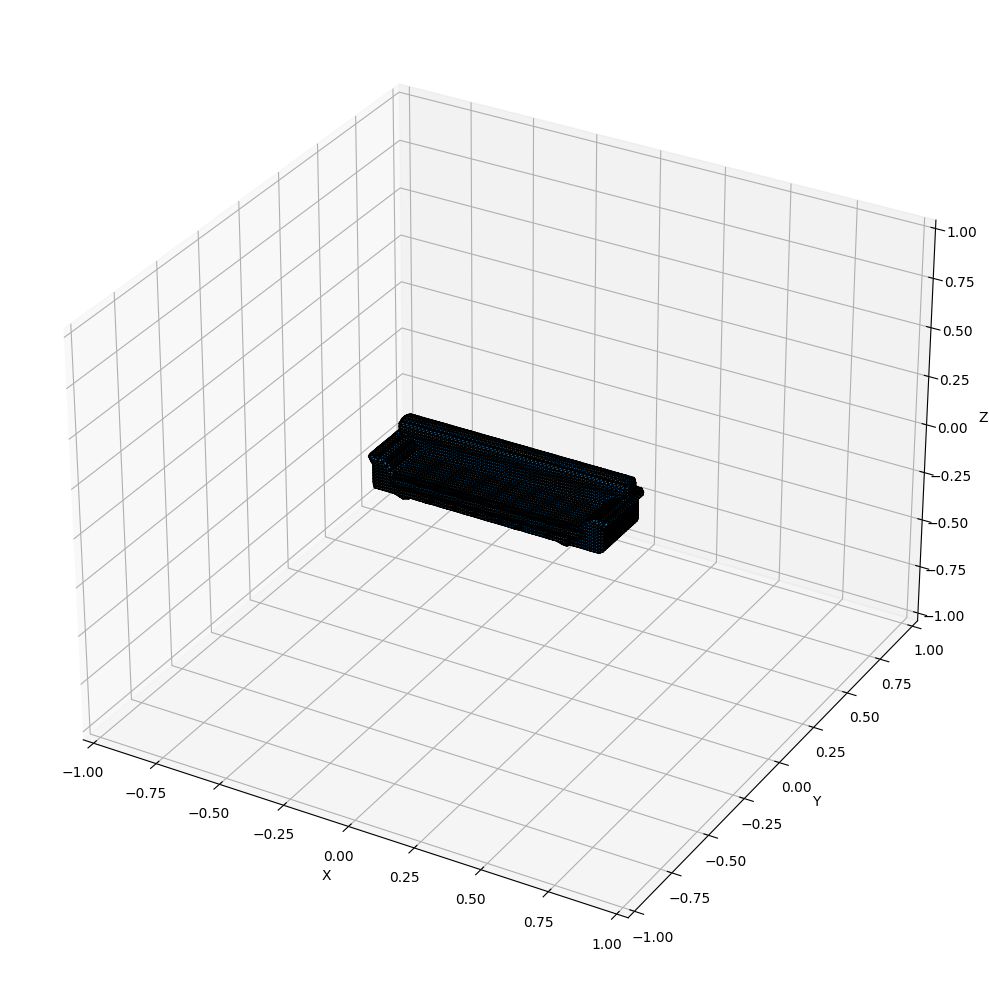

In [23]:
# https://scikit-image.org/docs/stable/auto_examples/edges/plot_marching_cubes.html
# https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.marching_cubes

verts, faces, normals, values = marching_cubes(volume, 0)
verts = verts / RES  # resize to [0,1]
verts = verts * 2 - 1  # center and scale to [-1,1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.tight_layout()
plt.show()

In [24]:
# optimal scale to plot the model
p1, p2 = verts.min(axis=0), verts.max(axis=0)
scale = np.min(2 / np.abs(p2 - p1))
lim = 1 / scale
lim

0.46077272598940033

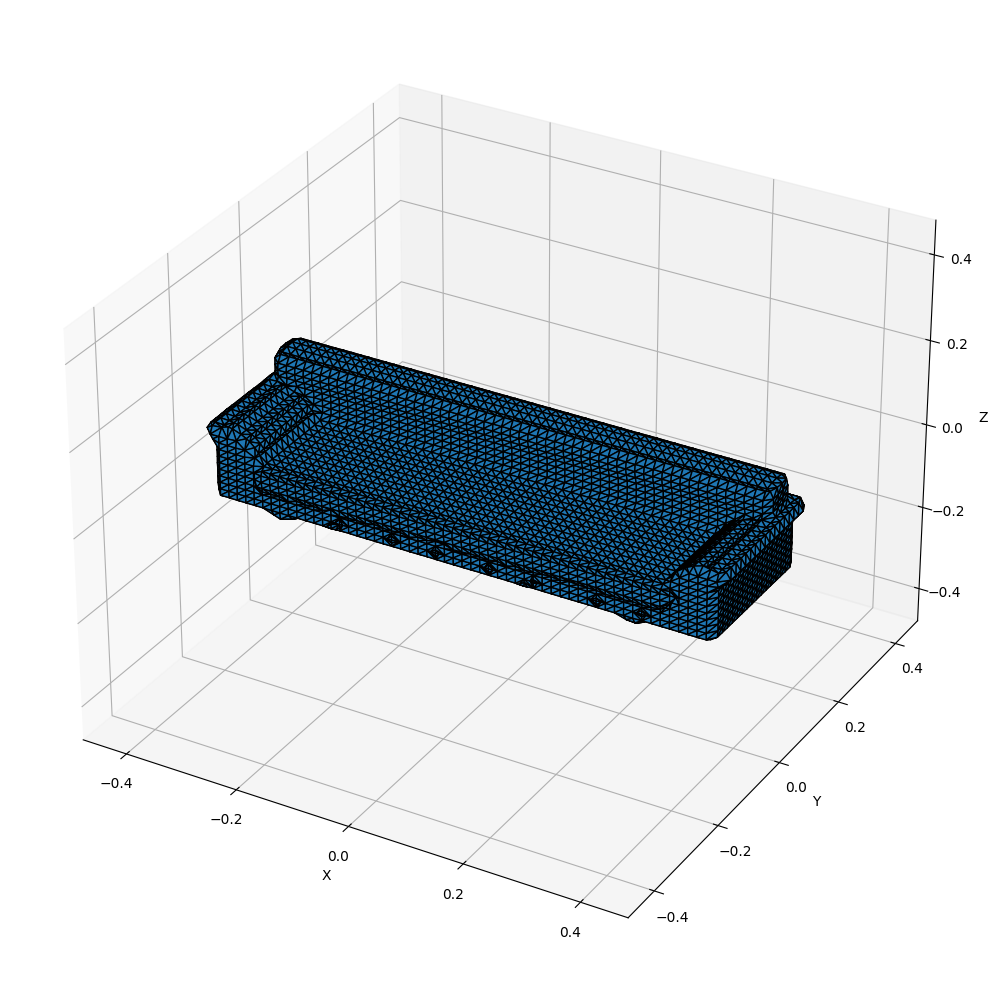

In [25]:
verts, faces, normals, values = marching_cubes(volume, 0)
verts = verts / RES  # resize to [0,1]
verts = verts * 2 - 1  # center and scale to [-1,1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

plt.tight_layout()
plt.show()

# Visualize open3d .ply files

In [26]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
# http://www.open3d.org/docs/latest/tutorial/Basic/visualization.html

PLY_FILE = "out_couch/test-surf.ply"
pcd = o3d.io.read_point_cloud(PLY_FILE)
o3d.visualization.draw_geometries([pcd])

In [28]:
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib

import matplotlib

cmap_rgba = matplotlib.colormaps.get_cmap('jet')
cmap = lambda q: cmap_rgba(q)[...,:3]

query = [0.1, 0.5, 0.7]
color = cmap(query)
color

array([[0.        , 0.        , 0.9456328 ],
       [0.49019608, 1.        , 0.47754586],
       [1.        , 0.77051561, 0.        ]])

In [29]:
grid_inside = np.array(df[df[3]<0].iloc[:,:3])
sd = np.array(df[df[3]<0].iloc[:,3])
sd = (sd - sd.min()) / (sd.max() - sd.min())
grid_inside_color = cmap(sd)

In [30]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(grid_inside)
pcd3.colors = o3d.utility.Vector3dVector(grid_inside_color)
o3d.visualization.draw_geometries([pcd3])